In [1]:
from google.colab import drive
drive.mount('/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /drive


In [2]:
import pandas as pd
import numpy as np
import os,os.path
import cv2
import glob
import imutils
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from google.colab.patches import cv2_imshow

In [ ]:
path = '/drive/My Drive/DASH/HW5/data/PerspectiveImages'
images = glob.glob(os.path.join(path,'*'))

# 전처리(1)
### RGB(혹은 BGR) 이미지를 HSV로 변환 
HSV에서 H(Hue)는 색상정보를 가지므로, hue가 노랑색 혹은 초록색 범위에 있는경우 데이터 삭제

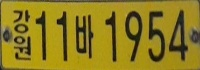

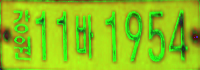

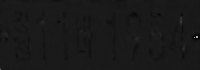

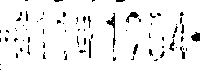

239.51785714285714


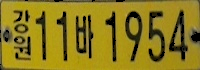

In [26]:
read_img = cv2.imread('/drive/My Drive/DASH/HW5/data/PerspectiveImages/강원11바19.jpg')
hsv = cv2.cvtColor(read_img,cv2.COLOR_BGR2HSV)
cv2_imshow(read_img)
cv2_imshow(hsv)
h,s,v = cv2.split(hsv)
cv2_imshow(h)
h = cv2.inRange(h,22,42)
cv2_imshow(h)
print(h.mean())
yellow_region = cv2.bitwise_and(hsv,hsv,mask=h)
yellow_region = cv2.cvtColor(yellow_region,cv2.COLOR_HSV2BGR)
cv2_imshow(yellow_region)

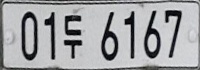

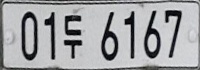

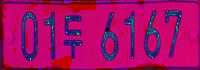

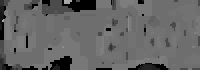

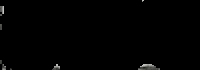

In [31]:
read_img = cv2.imread('/drive/My Drive/DASH/HW5/data/PerspectiveImages/01두6167.jpg')
cv2_imshow(read_img)
hsv = cv2.cvtColor(read_img,cv2.COLOR_BGR2HSV)
cv2_imshow(read_img)
cv2_imshow(hsv)
h,s,v = cv2.split(hsv)
cv2_imshow(h)
h = cv2.inRange(h,22,42)
yellow_region = cv2.bitwise_and(hsv,hsv,mask=h)
yellow_region = cv2.cvtColor(yellow_region,cv2.COLOR_HSV2BGR)
cv2_imshow(yellow_region)

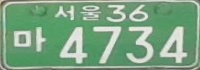

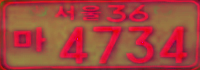

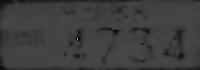

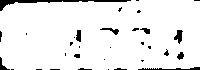

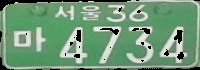

In [28]:
read_img = cv2.imread('/drive/My Drive/DASH/HW5/data/PerspectiveImages/서울36마47.jpg')
hsv = cv2.cvtColor(read_img,cv2.COLOR_BGR2HSV)
cv2_imshow(read_img)
cv2_imshow(hsv)
h,s,v = cv2.split(hsv)
cv2_imshow(h)
h = cv2.inRange(h,45,75)
cv2_imshow(h)
yellow_region = cv2.bitwise_and(hsv,hsv,mask=h)
yellow_region = cv2.cvtColor(yellow_region,cv2.COLOR_HSV2BGR)
cv2_imshow(yellow_region)

In [ ]:
for file in images:
  read_img = cv2.imread(file)
  hsv = cv2.cvtColor(read_img,cv2.COLOR_BGR2HSV)
  h,s,v = cv2.split(hsv)
  is_yellow = (cv2.inRange(h,22,42).mean() > 50)
  is_green = (cv2.inRange(h,45,75).mean() > 50)
  if is_yellow or is_green:
    continue
  file_name = file.split('/')[7]
  cv2.imwrite('/drive/My Drive/DASH/HW5/data/preprocessed_data/'+file_name,read_img)

# 전처리(2)
### opencv를 이용한 contour추출
1. 이미지를 흑백으로 변환
2. threshold를 기준으로 이미지 이진화
3. 윤곽 좌표추출 및 좌표를 기반으로 각 문자를 파일로 저장

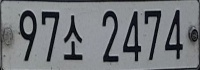

In [33]:
read_img = cv2.imread('/drive/My Drive/DASH/HW5/data/preprocessed_data/97소2474.jpg')
cv2_imshow(read_img)

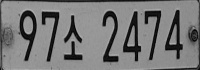

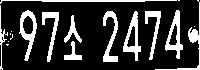

In [34]:
read_gray = cv2.cvtColor(read_img,cv2.COLOR_BGR2GRAY)
cv2_imshow(read_gray)
thresh = cv2.threshold(read_gray,127,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cv2_imshow(thresh)

In [ ]:
contours, _ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
for contour in contours:
    (x,y,w,h) = cv2.boundingRect(contour)
    print(x,y,w,h)
    cv2_imshow(read_img[y:y+h,x:x+w])

In [ ]:
images = glob.glob(os.path.join('/drive/My Drive/DASH/HW5/data/preprocessed_data/','*'))

In [ ]:
import random
target_folder = '/drive/My Drive/DASH/HW5/data/korean_train/'
def saveimage(folder_name,image_arr):
  path = os.path.join(target_folder,folder_name)
  if not os.path.exists(path):
    os.makedirs(path)
  p = os.path.join(path,str(random.randint(1,10000))+'.jpg')
  cv2.imwrite(p,image_arr)

In [ ]:
for file in images:
  file_name = file.split('/')[7]
  image = cv2.imread(file)
  gray_scale = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  thresh = cv2.threshold(gray_scale,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  contours, _ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
  for contour in contours:
    (x,y,w,h) = cv2.boundingRect(contour)
    
    if x >= 15 and x <=25:
      img = image[10:60,x:x+20]
      folder_name = file_name[0]
      #saveimage(folder_name,img)
    elif x >=35 and x<=45:
      img = image[10:60,x:x+20]
      folder_name = file_name[1]
      #saveimage(folder_name,img)
    elif x >=55 and x <=65:
      img = image[10:60,x:x+20]
      folder_name = file_name[2]+file_name[3]
      saveimage(folder_name,img)
    elif x >=95 and x <=105:
      img = image[10:60,x:x+20]
      folder_name = file_name[4]
      #saveimage(folder_name,img)
    elif x >= 114 and x <= 124:
      img = image[10:60,x:x+20]
      folder_name = file_name[5]
      #saveimage(folder_name,img)
    elif x >= 130 and x <= 140:
      img = image[10:60,x:x+20]
      folder_name = file_name[6]
      #saveimage(folder_name,img)     
    elif x >= 155 and x <= 165:
      img = image[10:60,x:x+20]
      folder_name = file_name[7]
      #saveimage(folder_name,img)    

#모델링
1. 간단한 형태의 CNN 모델 사용
2. 한국어와 숫자를 구분하여 학습
3. 입력받은 번호판에서 문자의 위치를 추출하여 각 문자를 예측함.
4. 각 문자에 대한 예측을 합쳐 번호판 번호를 예측함.

In [20]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory('/drive/My Drive/DASH/HW5/data/number_train_3/',target_size=(50,20),class_mode = 'categorical',color_mode='rgb')
training_set_k = train_datagen.flow_from_directory('/drive/My Drive/DASH/HW5/data/korean_train/',target_size=(50,20),class_mode = 'categorical',color_mode='rgb')

Found 4384 images belonging to 10 classes.
Found 987 images belonging to 34 classes.


In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(5,5),input_shape=(50,20,3),activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(keras.layers.Conv2D(32,(5,5),activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(500,activation = 'relu'))
model.add(keras.layers.Dense(10,activation = 'softmax'))
model.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])
model.fit(training_set,epochs=30)

In [ ]:
model_k = keras.Sequential()
model_k.add(keras.layers.Conv2D(32,(5,5),input_shape=(50,20,3),activation = 'relu'))
model_k.add(keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model_k.add(keras.layers.Conv2D(32,(5,5),activation = 'relu'))
model_k.add(keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model_k.add(keras.layers.Flatten())
model_k.add(keras.layers.Dense(500,activation = 'relu'))
model_k.add(keras.layers.Dense(34,activation = 'softmax'))
model_k.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])
model_k.fit(training_set_k,epochs=20)

In [7]:
d = training_set.class_indices
dk = training_set_k.class_indices

In [8]:
dict_class = {v:k for k,v in d.items()}
dict_class_k = {v:k for k,v in dk.items()}

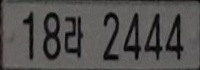

18러2444


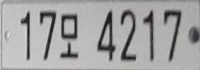

17모4217


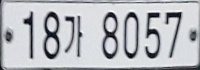

18가8057


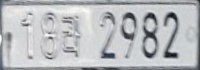

18라2982


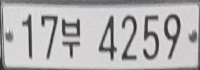

17부4259


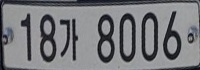

18가8006


In [29]:
files = glob.glob(os.path.join('/drive/My Drive/DASH/HW5/data/test/','*'))
for file in files:
  image = cv2.imread(file)
  gray_scale = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  thresh = cv2.threshold(gray_scale,0,255,cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)[1]
  contours, _ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
  for contour in contours:
      (x,y,w,h) = cv2.boundingRect(contour)
      
      if x >= 15 and x <=25:
        img = image[10:60,x:x+20]
        img = np.expand_dims(img,axis=0)
        pred = model.predict_classes(img)
        letter1 = dict_class[pred[0]]
        
      elif x >=35 and x<=45:
        img = image[10:60,x:x+20]
        img = np.expand_dims(img,axis=0)
        pred = model.predict_classes(img)
        letter2 = dict_class[pred[0]]
        
      elif x >=55 and x <=65:
        img = image[10:60,x:x+20]
        img = np.expand_dims(img,axis=0)
        pred = model_k.predict_classes(img)
        letter3 = dict_class_k[pred[0]]
        
      elif x >=100 and x <=110:
        img = image[10:60,x:x+20]
        img = np.expand_dims(img,axis=0)
        pred = model.predict_classes(img)
        letter4 = dict_class[pred[0]]
        
      elif x >= 120 and x <= 130:
        img = image[10:60,x:x+20]
        img = np.expand_dims(img,axis=0)
        pred = model.predict_classes(img)
        letter5 = dict_class[pred[0]]
        
        
      elif x >= 140 and x <= 150:
        img = image[10:60,x:x+20]
        img = np.expand_dims(img,axis=0)
        pred = model.predict_classes(img)
        letter6 = dict_class[pred[0]]
            
      elif x >= 160 and x <= 170:
        img = image[10:60,x:x+20]
        img = np.expand_dims(img,axis=0)
        pred = model.predict_classes(img)
        letter7 = dict_class[pred[0]]

  predict_letter = letter1+letter2+letter3+letter4+letter5+letter6+letter7
  cv2_imshow(image)
  print(predict_letter)